# Create crossval tables

This notebook is dedicated to create the cv table to all tunings produced during 2020 for tracking purpose.


In [7]:
from kolmov import crossval_table, get_color_fader
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [8]:
def create_op_dict(op):
    d = {
              op+'_pd_ref'    : "reference/"+op+"_cutbased/pd_ref#0",
              op+'_fa_ref'    : "reference/"+op+"_cutbased/fa_ref#0",
              op+'_sp_ref'    : "reference/"+op+"_cutbased/sp_ref",
              op+'_pd_val'    : "reference/"+op+"_cutbased/pd_val#0",
              op+'_fa_val'    : "reference/"+op+"_cutbased/fa_val#0",
              op+'_sp_val'    : "reference/"+op+"_cutbased/sp_val",
              op+'_pd_op'     : "reference/"+op+"_cutbased/pd_op#0",
              op+'_fa_op'     : "reference/"+op+"_cutbased/fa_op#0",
              op+'_sp_op'     : "reference/"+op+"_cutbased/sp_op",

              # Counts
              op+'_pd_ref_passed'    : "reference/"+op+"_cutbased/pd_ref#1",
              op+'_fa_ref_passed'    : "reference/"+op+"_cutbased/fa_ref#1",
              op+'_pd_ref_total'     : "reference/"+op+"_cutbased/pd_ref#2",
              op+'_fa_ref_total'     : "reference/"+op+"_cutbased/fa_ref#2",
              op+'_pd_val_passed'    : "reference/"+op+"_cutbased/pd_val#1",
              op+'_fa_val_passed'    : "reference/"+op+"_cutbased/fa_val#1",
              op+'_pd_val_total'     : "reference/"+op+"_cutbased/pd_val#2",
              op+'_fa_val_total'     : "reference/"+op+"_cutbased/fa_val#2",
              op+'_pd_op_passed'     : "reference/"+op+"_cutbased/pd_op#1",
              op+'_fa_op_passed'     : "reference/"+op+"_cutbased/fa_op#1",
              op+'_pd_op_total'      : "reference/"+op+"_cutbased/pd_op#2",
              op+'_fa_op_total'      : "reference/"+op+"_cutbased/fa_op#2",
    }
    return d

tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              } )

tuned_info.update(create_op_dict('tight'))
tuned_info.update(create_op_dict('medium'))
tuned_info.update(create_op_dict('loose'))
tuned_info.update(create_op_dict('vloose'))

In [9]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.37, 2.50]

## 1) Reading all tunings:


In [12]:
cv_v8    = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v9    = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v10   = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v11   = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v1_el = crossval_table( tuned_info, etbins = etbins , etabins = etabins )
cv_v2_el = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [13]:
# just for comparison
cv_v8.from_csv('output/table_v8.csv')
cv_v9.from_csv('output/table_v9.csv')
cv_v10.from_csv('output/table_v10.csv')
cv_v11.from_csv('output/table_v11.csv')
cv_v1_el.fill( '/home/jodafons/public/tuning_data/Zee_el/v1/r1/*/*/*.gz', 'v1-el') 
cv_v2_el.fill( '/home/jodafons/public/tuning_data/Zee_el/v2/r1/*/*/*.gz', 'v2-el') 

Reading v2-el...: 100%|██████████| 2500/2500 [01:17<00:00, 32.37it/s]

2021-11-12 10:17:42,764 | Py.crossval_table                       INFO Reading file for v1-el tag from /home/jodafons/public/tuning_data/Zee_el/v1/r1/*/*/*.gz
2021-11-12 10:18:58,210 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...
2021-11-12 10:19:02,559 | Py.crossval_table                       INFO Reading file for v2-el tag from /home/jodafons/public/tuning_data/Zee_el/v2/r1/*/*/*.gz
2021-11-12 10:20:19,860 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...


In [14]:
cv_v1_el.to_csv('output/table_v1_el.csv')
cv_v2_el.to_csv('output/table_v2_el.csv')

### 1.1) Get best inits and sorts:

In [15]:
best_inits_v8 = cv_v8.filter_inits("max_sp_val")
best_sorts_v8 = cv_v8.filter_sorts( best_inits_v8 , 'max_sp_op')
best_inits_v8 = best_inits_v8.loc[best_inits_v8.model_idx==3]

In [16]:
best_inits_v9 = cv_v9.filter_inits("max_sp_val")
best_sorts_v9 = cv_v9.filter_sorts( best_inits_v9 , 'max_sp_op')

In [17]:
best_inits_v10 = cv_v10.filter_inits("max_sp_val")
best_sorts_v10 = cv_v10.filter_sorts( best_inits_v10 , 'max_sp_op')

In [18]:
best_inits_v11 = cv_v11.filter_inits("max_sp_val")
best_sorts_v11 = cv_v11.filter_sorts( best_inits_v11 , 'max_sp_op')

In [19]:
def fix_counts( table_orig, table_as_ref):
    dataframe = collections.OrderedDict({})
    for key in table_orig.columns:
        dataframe[key] = []
        
    for idx, row in table_orig.iterrows():
        current_table = table_as_ref.loc[(table_as_ref.et_bin==row['et_bin'])&(table_as_ref.eta_bin==row['eta_bin'])]
        for key in table_orig.columns:
            if 'total' in key:
                dataframe[key].append(current_table[key].values[0])
            elif 'passed' in key:
                total=current_table[key.replace('passed','total')].values[0]
                passed=total*row[key.replace('_passed','')]
                dataframe[key].append(passed)
            else:
                dataframe[key].append(row[key])
    return pd.DataFrame(dataframe)

# Fix this tables since we have less events than v8. 
cv_v1_el.set_table( fix_counts(cv_v1_el.table(), cv_v8.table() ) )
cv_v2_el.set_table( fix_counts(cv_v2_el.table(), cv_v8.table() ) )

In [20]:
best_inits_v1_el = cv_v1_el.filter_inits("max_sp_val")
best_sorts_v1_el = cv_v1_el.filter_sorts( best_inits_v1_el , 'max_sp_op')

In [21]:
best_inits_v2_el = cv_v2_el.filter_inits("max_sp_val")
best_sorts_v2_el = cv_v2_el.filter_sorts( best_inits_v2_el , 'max_sp_op')

In [22]:
best_inits = pd.concat([
                        best_inits_v8,
                        best_inits_v9,
                        best_inits_v10,
                        best_inits_v11,
                        best_inits_v1_el,
                        best_inits_v2_el,
                       ])
best_sorts = pd.concat([
                        best_sorts_v8,
                        best_sorts_v9,
                        best_sorts_v10,
                        best_sorts_v11,
                        best_sorts_v1_el,
                        best_sorts_v2_el,
                       ])

### 1.2) Make the table:

In [23]:
for op in ['tight','medium','loose','vloose']:
    cv_v8.dump_beamer_table( best_inits ,  [op], 'tuning_v8_to_v2_el_'+op, 
                             title = op+' Tunings (v8 to v11)', 
                             tags = ['v8','v9','v10','v11','v1-el','v2-el']
                           )

2021-11-12 10:25:07,274 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v2_el_tight.pdf latex code...
2021-11-12 10:25:11,264 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v2_el_medium.pdf latex code...
2021-11-12 10:25:15,092 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v2_el_loose.pdf latex code...
2021-11-12 10:25:18,897 | Py.BeamerTexReportTemplate1             INFO Started creating beamer file tuning_v8_to_v2_el_vloose.pdf latex code...


In [24]:
!mv *.tex output
!mv *.pdf output

### 1.3) Plot training curves:

In [25]:
cv_v1_el.plot_training_curves( best_inits_v1_el, best_sorts_v1_el , 'output/v1-el' )

In [26]:
cv_v2_el.plot_training_curves( best_inits_v2_el, best_sorts_v2_el , 'output/v2-el' )

### 1.4) Plot RoC curves:

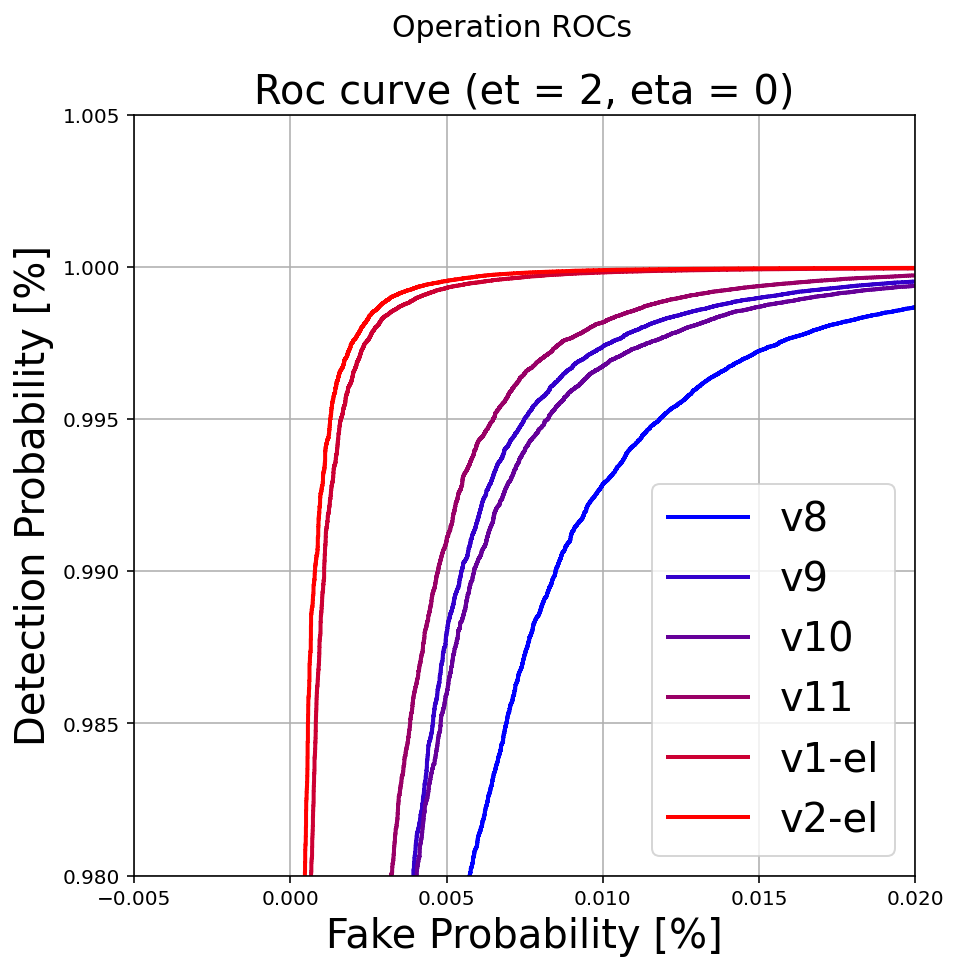

In [27]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9', 'v10','v11','v1-el','v2-el'], 
                        ['v8', 'v9', 'v10','v11','v1-el', 'v2-el'], 
                        'output/roc_v8_to_v2_el_et2_eta0.pdf', display=True, 
                        colors=get_color_fader('blue','red',6) ,
                        et_bin=2, eta_bin=0, xmin=-0.005, xmax=0.02, ymin=0.980, ymax=1.005, 
                        fontsize=20,
                        figsize=(7,7))

In [28]:
cv_v8.plot_roc_curves( best_sorts, ['v8', 'v9','v10','v11','v1-el','v2-el'], 
                       ['v8', 'v9','v10','v11','v1-el','v2-el'], 
                        'output/rocs_v8_to_v2_el.pdf',display=False, colors=get_color_fader('blue','red',6),
                       figsize=(30,30))